
#### Important Instructions and Submission Guidelines:
- Naming convention for submission of this notebook is `RollNumber_partB_PA1.ipynb` where. For example: `21030020_PA.ipynb`

- You are advised to follow good programming practies including approriate variable naming and making use of logical comments


The university honor code should be maintained. Any violation, if found, will result in disciplinary action.


In [ ]:
# Part 0

# Import necessary libraries
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Load the breast cancer dataset and reduce the size
data = load_breast_cancer()
X = data.data[:100]  # Use first 100 samples for smaller dataset
y = data.target[:100]

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Logistic Regression model


# Make predictions on the test set

# Evaluate the model's accuracy




print(f"Accuracy of the Logistic Regression model: {accuracy}")

# TASK: Experiment with different classification models (e.g., Decision Tree, SVM, KNN)
#       Evaluate their performance using accuracy.
#       Compare the results and discuss which model performs best for this dataset.
#       Try to improve the performance of the chosen model by tuning its hyperparameters.

# Hint: You can use scikit-learn library for other classifiers.  Refer to the documentation.

# Part A

For this section, your task is simply to execute the code and display the predicted images for a random selection of morethen 10 images from the provided image dataset.

# Segmentation of Water Channels to Measure Water Contamination Due to Trash


#### attached images is also uploaded on LMS named a.png

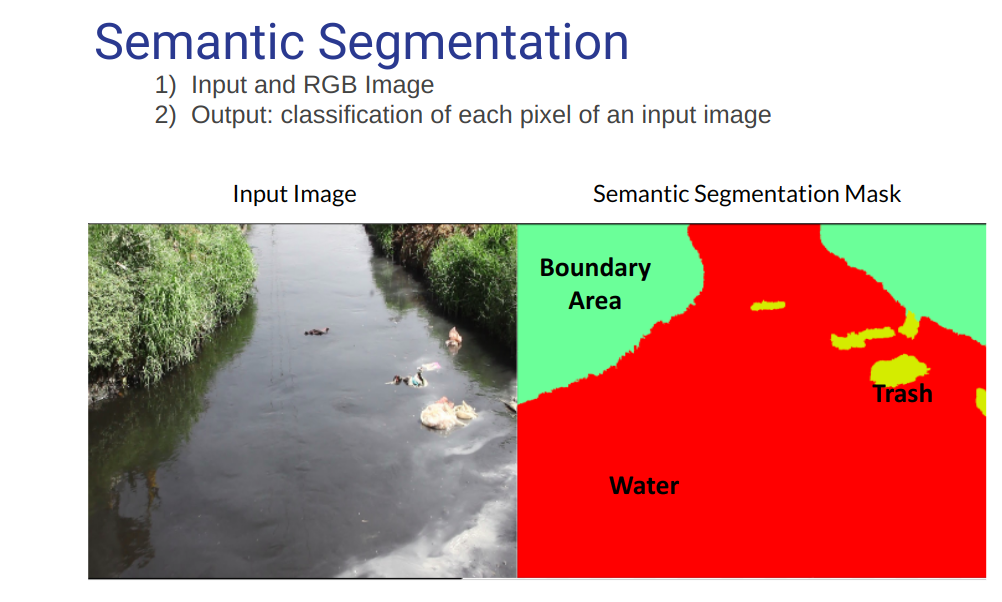

In [ ]:
import keras
from keras.models import Model
from keras.layers import Input,SeparableConv2D
from keras.layers.core import Activation, Reshape
from keras.layers.convolutional import Convolution2D
from keras.layers.normalization import BatchNormalization
import os, sys
import numpy as np
import cv2
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization,UpSampling2D,concatenate,Reshape
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.utils import plot_model, to_categorical
import keras.backend as K
from keras.utils import  to_categorical
import keras
from keras import optimizers
import tensorflow as tf

from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau, TensorBoard


In [ ]:


Beta=[0.011676873, 0.869083715, 0.119239412]
Beta= np.array(Beta)
# print(Beta)
def convert_to_logits(y_pred):
      # see https://github.com/tensorflow/tensorflow/blob/r1.10/tensorflow/python/keras/backend.py#L3525
    y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
    return tf.math.log(y_pred / (1 - y_pred))

def blance_loss(y_true, y_pred):
    y_pred = convert_to_logits(y_pred)
    pos_weight =Beta
    loss = tf.nn.weighted_cross_entropy_with_logits(logits=y_pred, labels=y_true, pos_weight=pos_weight)

    # or reduce_sum and/or axis=-1
    return tf.reduce_mean(loss *(Beta))


#Model
inputs = Input((256,256,3))
conv1 = SeparableConv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
conv1 = SeparableConv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = SeparableConv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
conv2 = SeparableConv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = SeparableConv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
conv3 = SeparableConv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = SeparableConv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
conv4 = SeparableConv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
conv5 = SeparableConv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
conv5 = SeparableConv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
drop5 = Dropout(0.5)(conv5)
up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
merge6 = concatenate([drop4,up6], axis = 3)
conv6 = SeparableConv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
conv6 = SeparableConv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
merge7 = concatenate([conv3,up7], axis = 3)
conv7 = SeparableConv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
conv7 = SeparableConv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
merge8 = concatenate([conv2,up8], axis = 3)
conv8 = SeparableConv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
conv8 = SeparableConv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
merge9 = concatenate([conv1,up9], axis = 3)
conv9 = SeparableConv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
conv9 = SeparableConv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv9 = SeparableConv2D(3, 3, activation = 'softmax', padding = 'same', kernel_initializer = 'he_normal')(conv9)

model = Model(inputs,conv9)
model.compile(optimizer = Adam(lr = 1e-4), loss =blance_loss, metrics = ['accuracy'])



In [ ]:

model.load_weights('model.h5')

#https://github.com/fezancs/Segmentation_detection-Model/blob/master/model.h5

#model file can be downloaded from given link



In [ ]:
def predict_(input_img):
    input_=np.array(cv2.imread(str(input_img)))
    input_ = cv2.resize(input_, (256,256), interpolation = cv2.INTER_NEAREST)
    input_=input_.reshape(1,256,256,3)
    input_=input_/255
    pre=model.predict(input_)
    pre=pre.reshape(256,256,3)
    pre=np.argmax(pre, axis=-1)
    label = keras.utils.to_categorical(pre,3)
    label[:,:,0]=label[:,:,1]
    label[:,:,2]=label[:,:,1]
    label=label*255
    cv2.imshow('Data', label)


In [ ]:
predict_("Input image Path")



# Part B: Building a Compact Model for Water Channel Segmentation to Measure Water Contamination Due to Trash

Dataset Link:  https://drive.google.com/file/d/1VtGna3bdJ1ms-qm6AKIT9xvjrU190HSk/view?usp=sharing

**Instructions:**
In this Task, you will explore the task of segmenting water channels in images to measure water contamination caused by trash. Your goal is to create a opptimized and small neural network model with fewer parameters while maintaining segmentation accuracy. Follow the steps below and answer the associated questions.

**Part 1: Understanding the Problem**

1. What is image segmentation, and why is it essential in environmental monitoring and water quality assessment?
2. Explain the concept of water channel segmentation for measuring water contamination due to trash. Why is this task challenging?
3. What is the significance of reducing the number of parameters in a neural network model for this task?

**Part 2: Data Preparation**

4. Describe the type of dataset required for training and evaluating a water channel segmentation model. What are the key elements of the dataset?
5. Where can you find or collect such a dataset for this specific task?
6. Explain the importance of data preprocessing and augmentation in training a robust segmentation model.

**Part 3: Model Architecture**

7. Define the concept of a neural network architecture. Why is it necessary for image segmentation?
8. Explain the differences between a U-Net architecture and a DeepLab architecture. Which one would you choose for this assignment, and why?
9. Discuss strategies for reducing the number of parameters in a neural network model, such as using smaller convolutional filters or depthwise separable convolutions.

**Part 4: Implementation**

10. Build a compact neural network model for water channel segmentation using a framework of your choice (e.g., TensorFlow or PyTorch).
11. Specify the architecture of your model, including the number of layers, types of layers, and the number of parameters.
12. How did you handle the trade-off between model simplicity (fewer parameters) and segmentation accuracy during model design and training?

**Part 5: Training and Evaluation**

13. Split your dataset into training, validation, and test sets. Explain why this split is essential.
14. Train your segmentation model using appropriate loss functions and metrics. Describe the training process, including the choice of optimizer and learning rate.
15. Evaluate the model's performance using relevant evaluation metrics (e.g., Intersection over Union - IoU, Dice coefficient). What are these metrics, and why are they used for segmentation tasks?
16. Compare the segmentation results of your compact model with a baseline model (a larger model with more parameters). Analyze the trade-offs in terms of accuracy and model complexity.

**Part 6: Conclusion and Future Work**

17. Summarize the key findings of your assignment, including the performance of your compact model in measuring water contamination due to trash.
18. Suggest possible ways to further improve the model's accuracy or reduce its parameter count.
19. Discuss the real-world applications and implications of your model in environmental conservation and water quality assessment.

**Part 7: Submission**

20. Compile your assignment report, including code snippets, training results, and discussions.
21. Provide a brief reflection on what you have learned from this assignment and how it has contributed to your understanding of neural networks and image segmentation.

This assignment will challenge students to not only build a neural network for image segmentation but also make critical decisions regarding model architecture and parameter optimization. It encourages them to think about the practical implications of their work in environmental science and conservation.



# Part C: Building a Similar Image Finder Web App with Streamlit

**Instructions:**
In this assignment, you will create a web application using Streamlit that allows users to upload an image and find similar images from a given database. You will need to implement both the backend image similarity search and the frontend user interface. Follow the steps below and answer the associated questions.

**Part 1: Understanding the Problem**

1. Explain the concept of image similarity search and its potential applications.
2. What are the challenges in building a web application that can find similar images in a database?

**Part 2: Data and Database**

3. Prepare a dataset of images that will serve as your image database for this assignment.
4. Describe the data preprocessing steps you performed on the images before building the similarity search feature.
5. How will you represent images in the database to enable efficient similarity search?

Dataset Link: https://docs.google.com/spreadsheets/d/121aV7BjJqCRlFcVegbbhI1Zmt67wG61ayRiFtDnafKY/edit?usp=sharing

**Part 3: Backend Implementation**

6. Implement a backend system that can compute image similarity scores between the uploaded image and images in the database.
7. What image feature extraction techniques or algorithms will you use to calculate image similarity?
8. How will you store and retrieve image similarity information efficiently?

**Part 4: Frontend Web App**

9. Use Streamlit to create a user-friendly web interface for the image similarity search.
10. Explain the structure and layout of your Streamlit app, including input fields, buttons, and result displays.
11. Provide instructions to users on how to interact with your web app, including how to upload an image.

**Part 5: Image Similarity Search**

12. Describe the algorithm or method you used to find similar images from the database based on the user's uploaded image.
13. Explain how the similarity scores are calculated and how you determine the most similar images.
14. How will you handle cases where there are no similar images found?

**Part 6: Testing and Evaluation**

15. Test your web app with a variety of images, including different image types and sizes. Document the results.
16. Evaluate the accuracy and efficiency of your image similarity search. What metrics will you use to assess its performance?
17. Discuss any challenges or limitations you encountered during testing and how you addressed them.

**Part 7: User Interface Design**

18. Explain the design choices you made for the user interface of your Streamlit app. How did you make it user-friendly and visually appealing?
19. Include screenshots of your web app to illustrate its user interface.

**Part 8: Conclusion and Future Improvements**

20. Summarize the key findings and experiences gained from building the image similarity search web app.
21. Discuss potential improvements or enhancements that could be made to the app, both in terms of functionality and user experience.

**Part 9: Submission**

22. Compile your assignment report, including code snippets, screenshots, and any additional documentation.
23. Provide a link to your working Streamlit app or instructions on how to run it locally.
24. Reflect on what you have learned from this assignment, especially in terms of web development and image processing.



# Basic Architecure for similarity model

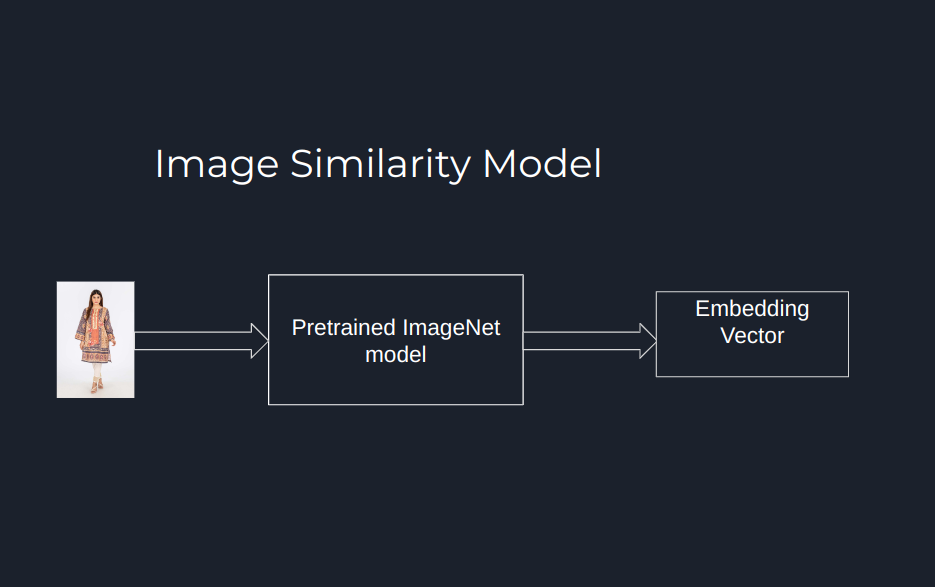

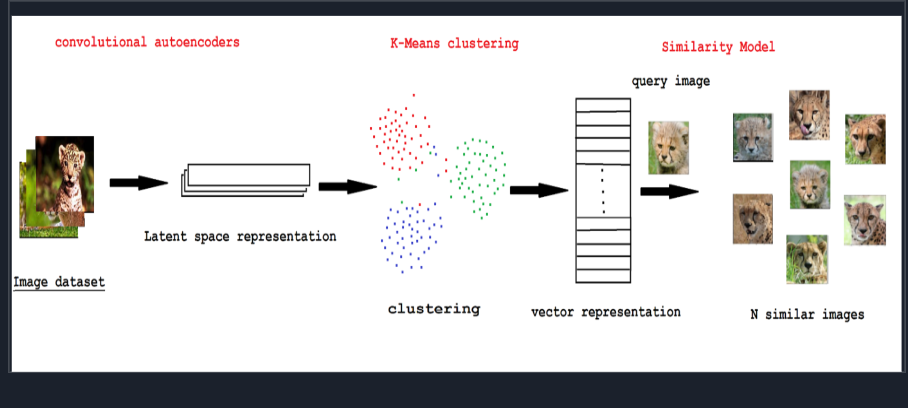

In [ ]:
# Part C: Building a Similar Image Finder Web App with Streamlit

# Import necessary libraries
import streamlit as st
import pandas as pd
from PIL import Image
import io

# Part 3: Backend Implementation
# Implement your image similarity calculation logic here

# Part 9: Submission
# Define a function to display the assignment report
def display_assignment_report():
    st.title("Image Similarity Finder Web App")
    st.header("Assignment Report")

    # Add your report content here

# Part 4: Frontend Web App
# Create a Streamlit app
def main():
    st.title("Image Similarity Finder")

    # Part 10: Explain the structure and layout of your Streamlit app

    # Part 11: Provide instructions to users
    st.sidebar.header("Instructions")
    st.sidebar.markdown("1. Upload an image.")
    st.sidebar.markdown("2. Click the 'Find Similar Images' button.")

    # Upload image
    uploaded_image = st.file_uploader("Upload an image", type=["jpg", "jpeg", "png"])

    if uploaded_image:
        # Display the uploaded image
        st.image(uploaded_image, caption="Uploaded Image", use_column_width=True)

        # Perform image similarity search
        if st.button("Find Similar Images"):
            # Call your image similarity search function here
            # Display results below

    # Part 18: User Interface Design
    # Explain design choices here

    # Part 19: Include screenshots of your web app
    st.sidebar.header("Screenshots")
    # Add screenshots here

if __name__ == "__main__":
    main()
